In [1]:
#!/usr/bin/env python
#coding=utf-8
import time
import os


#获得当前系统时间的字符串
localtime=time.strftime('%Y-%m-%d %H:%M:%S',time.localtime(time.time()))
print('localtime='+localtime)
#系统当前时间年份
year=time.strftime('%Y',time.localtime(time.time()))
#月份
month=time.strftime('%m',time.localtime(time.time()))
#日期
day=time.strftime('%d',time.localtime(time.time()))
#具体时间 小时分钟毫秒
mdhms=time.strftime('%m%d%H%M%S',time.localtime(time.time()))

fileYear=os.getcwd()+'/'+year
fileMonth=fileYear+'/'+month
fileDay=fileMonth+'/'+day

if not os.path.exists(fileYear):
    os.mkdir(fileYear)
    os.mkdir(fileMonth)
    os.mkdir(fileDay)
else:
    if not os.path.exists(fileMonth):
        os.mkdir(fileMonth)
        os.mkdir(fileDay)
    else:
        if not os.path.exists(fileDay):
            os.mkdir(fileDay)

#创建一个文件，以‘timeFile_’+具体时间为文件名称
fileDir=fileDay+'/timeFile_'+mdhms+'.txt'
out=open(fileDir,'w')
#在该文件中写入当前系统时间字符串
out.write('localtime='+localtime)
out.close()

localtime=2019-07-22 22:02:44


In [2]:
def conv(img, conv_filter):
    if len(img.shape) > 2 or len(conv_filter.shape) > 3: # Check if number of image channels matches the filter depth.
        if img.shape[-1] != conv_filter.shape[-1]:
            print("Error: Number of channels in both image and filter must match.")
            sys.exit()
    if conv_filter.shape[1] != conv_filter.shape[2]: # Check if filter dimensions are equal.
        print('Error: Filter must be a square matrix. I.e. number of rows and columns must match.')
        sys.exit()
    if conv_filter.shape[1]%2==0: # Check if filter diemnsions are odd.
        print('Error: Filter must have an odd size. I.e. number of rows and columns must be odd.')
        sys.exit()

    # An empty feature map to hold the output of convolving the filter(s) with the image.
    feature_maps = numpy.zeros((img.shape[0]-conv_filter.shape[1]+1, 
                                img.shape[1]-conv_filter.shape[1]+1, 
                                conv_filter.shape[0]))

    # Convolving the image by the filter(s).
    for filter_num in range(conv_filter.shape[0]):
        print("Filter ", filter_num + 1)
        curr_filter = conv_filter[filter_num, :] # getting a filter from the bank.
        """ 
        Checking if there are mutliple channels for the single filter.
        If so, then each channel will convolve the image.
        The result of all convolutions are summed to return a single feature map.
        """
        if len(curr_filter.shape) > 2:
            conv_map = conv_(img[:, :, 0], curr_filter[:, :, 0]) # Array holding the sum of all feature maps.
            for ch_num in range(1, curr_filter.shape[-1]): # Convolving each channel with the image and summing the results.
                conv_map = conv_map + conv_(img[:, :, ch_num], 
                                  curr_filter[:, :, ch_num])
        else: # There is just a single channel in the filter.
            conv_map = conv_(img, curr_filter)
        feature_maps[:, :, filter_num] = conv_map # Holding feature map with the current filter.
    return feature_maps # Returning all feature maps.
    

In [3]:
import numpy as np
def Conv2(img, H, W, kernel, n):
    # img：输入图片；W,H：图片的宽和高；kernel：卷积核。
    # return：和输入图像尺寸大小相同的feature map；
    # 卷积大小固定为3*3卷积，这里因为固定了卷积大小，所以写代码前可以直接确定：卷积步长为1，四周个填充一排0
    col = np.zeros(H)
    raw = np.zeros(W + 2)
    img = np.insert(img, W, values=col, axis=1)
    img = np.insert(img, 0, values=col, axis=1)
    img = np.insert(img, H, values=raw, axis=0)
    img = np.insert(img, 0, values=raw, axis=0)
    res = np.zeros([H,W])##直接新建一个全零数组，省去了后边逐步填充数组的麻烦
    for i in range(H):
        for j in range(W):
            temp = img[i:i + 3, j:j + 3]
            temp = np.multiply(temp,kernel)
            res[i][j] = temp.sum()

    return (res)

if __name__ == '__main__':

    A = np.array([[1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1]])  # 4行5列
    ken = np.array([[2, 2, 2], [2, 2, 2], [2, 2, 2]])
    print(Conv2(A, 4, 5, ken, 3))


[[ 8. 12. 12. 12.  8.]
 [12. 18. 18. 18. 12.]
 [12. 18. 18. 18. 12.]
 [ 8. 12. 12. 12.  8.]]


In [4]:
import numpy as np
import wrf
# 读取WRF 经纬度
import xarray
file_name_nc='C:\\Users\\lining\\Desktop\\myjob\\My_WRF\\wrfout_d01_2019-03-27_20_00_00'
ds = xarray.open_dataset(file_name_nc)
T=np.squeeze(ds['T'][dict( bottom_top=1)])

In [5]:
T.values

array([[  1.4823723,   1.4884171,   1.4940699, ...,   1.410256 ,
          1.4342661,   1.419099 ],
       [  1.4274749,   1.372609 ,   1.3705959, ...,   1.2921603,
          1.3171743,   1.3417056],
       [  1.3425694,   1.2823249,   1.2818682, ...,   1.1937443,
          1.204292 ,   1.2102673],
       ...,
       [-13.499265 , -13.283596 , -12.813159 , ..., -23.116184 ,
        -22.999384 , -22.042324 ],
       [-13.670435 , -13.500303 , -13.063552 , ..., -22.636232 ,
        -22.536104 , -21.704016 ],
       [-13.731731 , -13.393823 , -12.996713 , ..., -21.83548  ,
        -21.587406 , -21.325161 ]], dtype=float32)

In [6]:
T.shape

(183, 282)

In [7]:
ken = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
ken=ken.T
after=Conv2(T.values, 183, 282, ken, 3)
#print(Conv2(T.values, 183, 282, ken, 3))

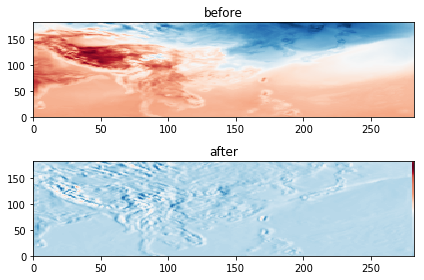

In [10]:
#conv(A, ken)
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
%matplotlib inline
fig, (ax0, ax1) = plt.subplots(2, 1)
c = ax0.pcolor(T,cmap='RdBu_r')
ax0.set_title('before')
c = ax1.pcolor(after,cmap='RdBu_r')#, edgecolors='k'
ax1.set_title('after')
fig.tight_layout()
plt.show()
